In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('../Data//Child-Data2018.csv', na_values='?')
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
data.drop(['Screening Type'] ,  axis = 1, inplace = True)
data.drop(['Case No'] ,  axis = 1, inplace = True)
data.replace("?",np.nan,inplace=True) #replace ? with nan

In [ ]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
Class,0,0.0
User,0,0.0
A2,0,0.0
A3,0,0.0
A4,0,0.0
A5,0,0.0
A6,0,0.0
A7,0,0.0
A8,0,0.0
A9,0,0.0


#### No Missing Data 

## ANOVA

In [ ]:
X_Feature = data.iloc[:,0:19]  #independent columns
Y_Feature = data.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

                     Feature     Score
0                         A1  3.667229
1                         A2  1.635814
2                         A3  1.134772
3                         A4  1.016165
4                         A5  1.170949
5                         A6  1.976923
6                         A7  1.027621
7                         A8  2.039737
8                         A9  3.669773
9                        A10  2.435682
10                       Age  1.137564
11                       Sex  4.590613
12                 Ethnicity  2.193765
13                 Jaundice   1.559587
14                Family_ASD  1.182080
15                 Residence  6.226144
16           Used_App_Before  1.008304
17  Why taken the screening   1.705200
18                     Score  1.615478


In [ ]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
                     Feature     Score
15                 Residence  6.226144
11                       Sex  4.590613
8                         A9  3.669773
0                         A1  3.667229
9                        A10  2.435682
12                 Ethnicity  2.193765
7                         A8  2.039737
5                         A6  1.976923
17  Why taken the screening   1.705200
1                         A2  1.635814
18                     Score  1.615478
13                 Jaundice   1.559587
14                Family_ASD  1.182080
4                         A5  1.170949
10                       Age  1.137564


## Chi

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1,10.484591
1,A2,6.534054
2,A3,2.507042
3,A4,4.157484
4,A5,2.978282
5,A6,5.198681
6,A7,3.693986
7,A8,9.154729
8,A9,16.388951
9,A10,6.354305


In [ ]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
            Feature       Score
15        Residence  679.595510
12        Ethnicity   28.581106
8                A9   16.388951
18            Score   12.341365
11              Sex   11.163970
13        Jaundice    10.505947
0                A1   10.484591
10              Age    9.535547
7                A8    9.154729
14       Family_ASD    8.830135
16  Used_App_Before    8.751899
1                A2    6.534054
9               A10    6.354305
5                A6    5.198681
3                A4    4.157484


## correlation

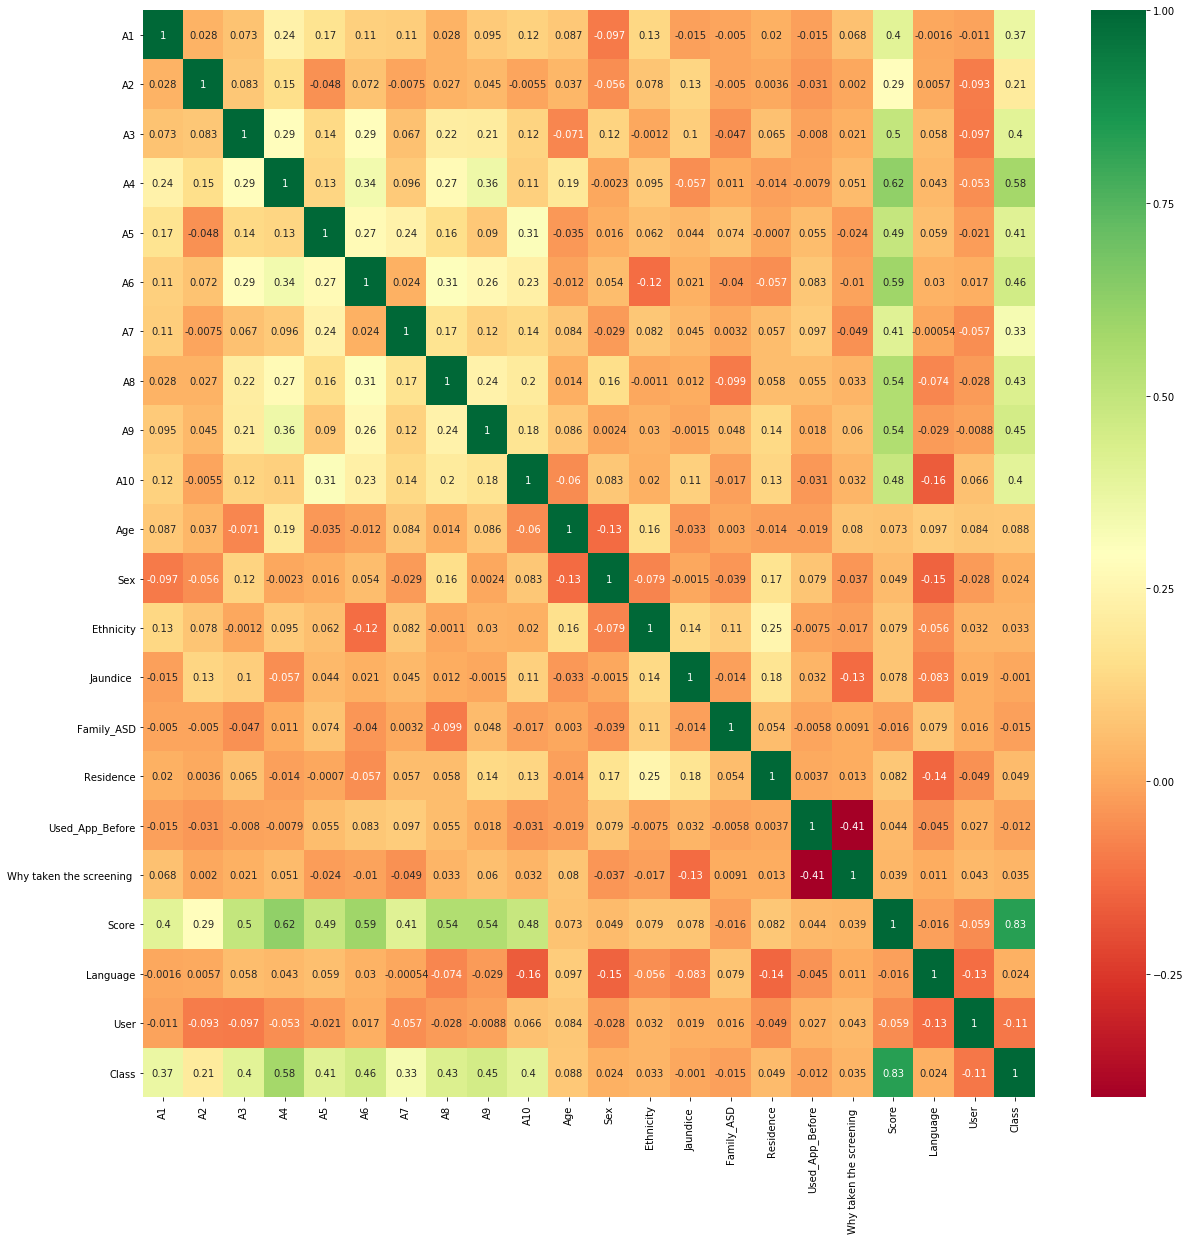

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")